# Generate random graphs

Change working directory (remember to replace "path-to-your-directory" with your own directory)

In [ ]:
%cd /"path-to-your-directory"/GP-GNN

Import used source files

In [2]:
import numpy as np
import time

from src.graph.graphProperties import GraphProperties
from src.graph.graph2D import Graph2D
from src.graph.graph3D import Graph3D

Include function to create equi-spaced vertices

In [3]:
from examples.graphs_generation.main import get_vertexes

Load plot function

In [4]:
from examples.discrete_laplacian.main import plot_testing

Force matplotlib to plot inline

In [5]:
%matplotlib inline

Set seed for reproducibility

In [6]:
import random
random.seed(42)

## 2D space

For a better visualization, we use graphs with 10 vertices, all with the same coordinates

In [7]:
v = get_vertexes(10)

### Directed graphs

Let's start with a generic directed graph with no particular properties

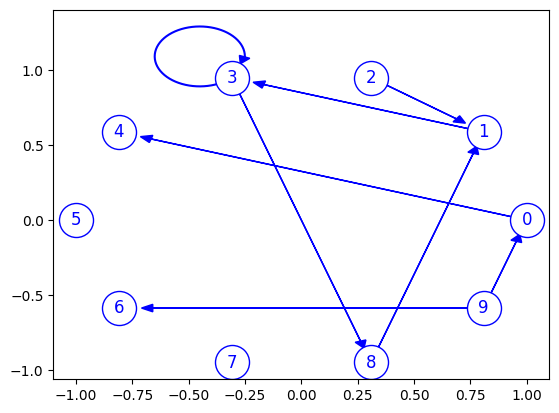

In [8]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=True, loop=True, weak_connected=False, acyclic=False)
g = Graph2D(p, v)
g.plot()

Now, we impose the graph to be acyclic (notice that in this case the loop parameter will be forced to False)

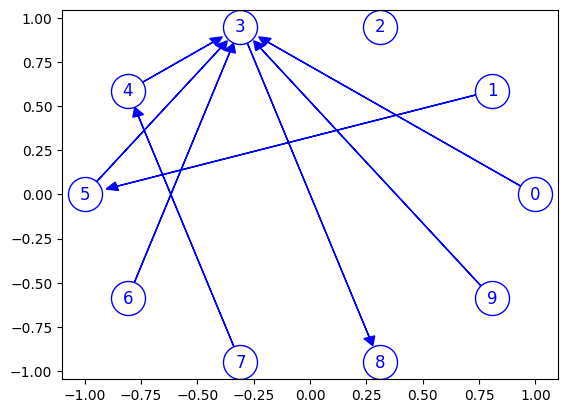

In [9]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=True, loop=True, weak_connected=False, acyclic=True)
g = Graph2D(p, v)
g.plot()

For a weak connected graph, we will have at least  n_vertexes-1  edges

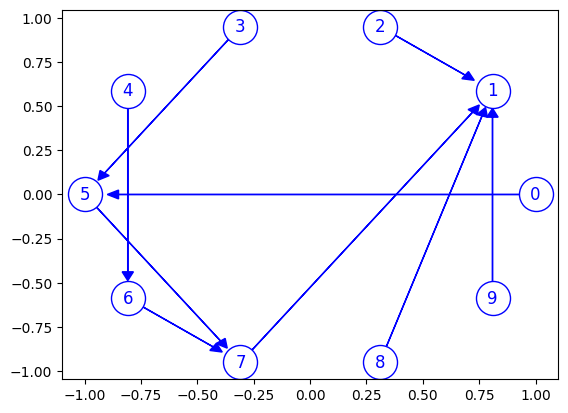

In [10]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=True, loop=True, weak_connected=True, acyclic=True)
g = Graph2D(p, v)
g.plot()

We can also have strong connected graph and in this case the graph can't be acyclic:

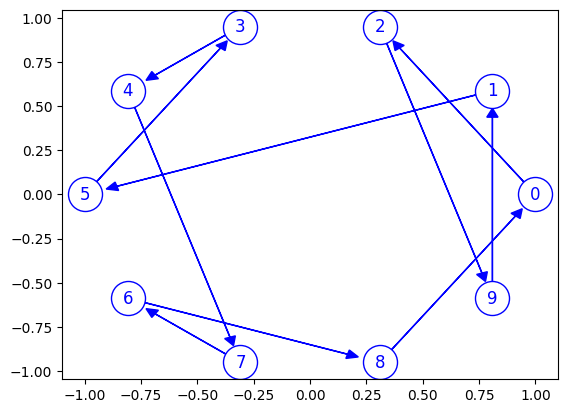

In [11]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=True, loop=True, strong_connected=True, acyclic=True)
g = Graph2D(p, v)
g.plot()

### Undirected graphs

For an undirected graph the loop property doesn't have sense and the weak and strong connection are meant to be the same. So a generic undirected graph can be generated as follows

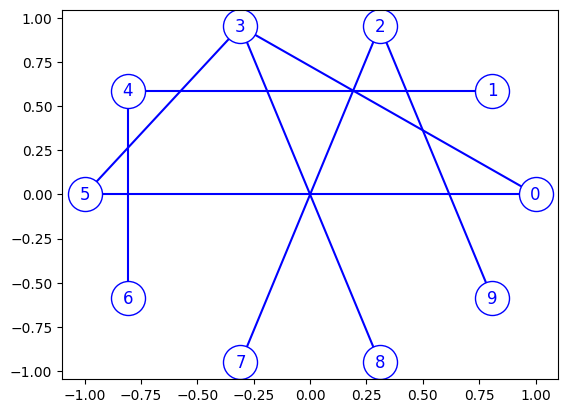

In [12]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=False, weak_connected=False, acyclic=False)
g = Graph2D(p, v)
g.plot()

Now, force the graph to be acyclic

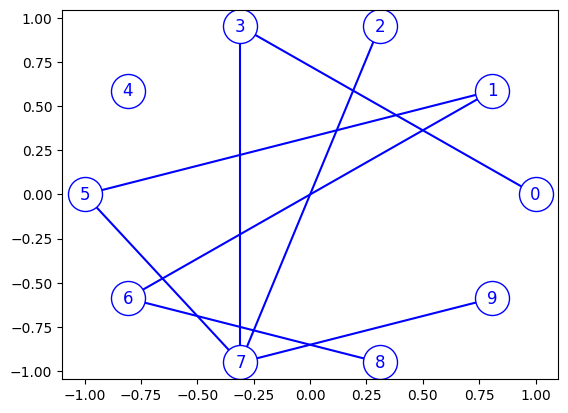

In [13]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=False, weak_connected=False, acyclic=True)
g = Graph2D(p, v)
g.plot()

And finally, our default options, that are undirected, acyclic and connected graph:

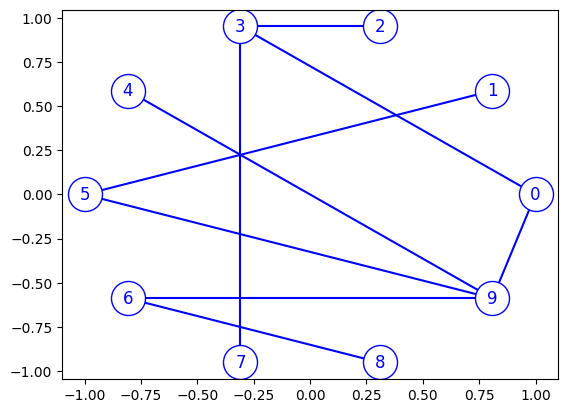

In [14]:
p = GraphProperties(n_vertexes=10)
g = Graph2D(p, v)
g.plot()

## 3D space

We recall that our code works in N-dimensional space, the children class 2D and 3D were made only for visualization purposes. For this reason, here we plot only 2 examples in 3-dimensional space.

### DAG in 3D

To create a direct acyclic graph in 3D simply call:

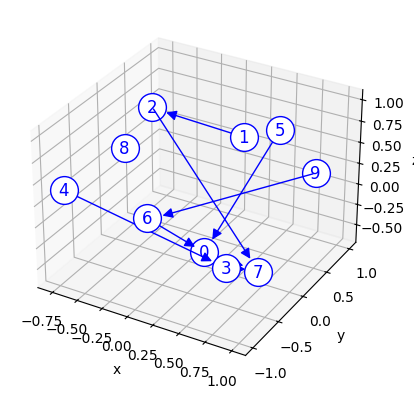

In [15]:
p = GraphProperties(n_vertexes=10, minimum_edges=8, directed=True, weak_connected=False, acyclic=True)
g = Graph3D(p)
g.plot()

### Undirected 3D graph

Default options in 3D to create an undirected, connected and acyclic graph

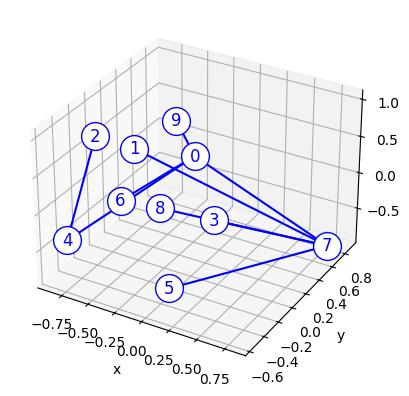

In [16]:
g = Graph3D.get_default_graph(n_vertexes=10)
g.plot()

## More options

Another interesting feature we have developed, it's the possibility of letting the code understand the type of graph, given the matrix of the vertex coordinates and the edge matrix

In [17]:
vertexes = get_vertexes(5)
edges = [[3, 3], [0, 2], [1, 0], [1, 2], [2, 2], [2, 0], [3, 0], [2, 1], [4, 0], [4, 4]]
p = GraphProperties.get_properties_from_graph(vertexes, edges)
print(p)

Number of vertexes: 5
Dimension of the space: 2
Limits of the bounding box are 
 [[-0.80901699  1.        ]
 [-0.95105652  0.95105652]]
Minimum edges tried to be added: 5
Is the graph directed: True
Does the graph allow self loop: True
Has the graph to be strongly connected: False
Has the graph to be weakly connected: True
Has the graph to be acyclic: False
Number of cycles in the graph: 6


For a visual confirmation, here the plot of the graph

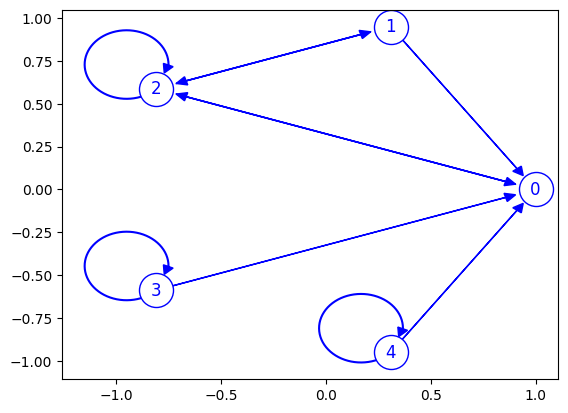

In [18]:
g = Graph2D(vertexes=vertexes, edges=edges)
g.plot()

Of course, this works also for undirected graphs, as we can see below

In [19]:
vertexes = get_vertexes(5)
edges = [[0, 3], [3, 0], [1, 0], [0, 1], [1, 2], [2, 1], [2, 0], [0, 2], [4, 0], [0, 4]]
p = GraphProperties.get_properties_from_graph(vertexes, edges)
print(p)

Number of vertexes: 5
Dimension of the space: 2
Limits of the bounding box are 
 [[-0.80901699  1.        ]
 [-0.95105652  0.95105652]]
Minimum edges tried to be added: 5
Is the graph directed: False
Does the graph allow self loop: False
Has the graph to be strongly connected: False
Has the graph to be weakly connected: True
Has the graph to be acyclic: False
Number of cycles in the graph: 1


For a visual confirmation, here the plot of the graph


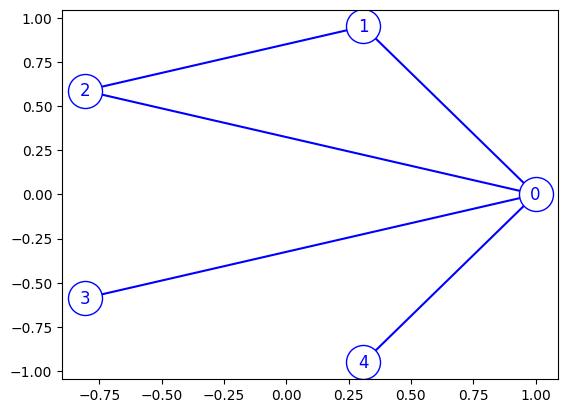

In [20]:
g = Graph2D(vertexes=vertexes, edges=edges)
g.plot()

## Creation time

To conclude, we test the creation time for different types of graph


In [21]:
nodes = [10, 50, 100, 500, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
time1, time2, time3 = [], [], []
for n_vertexes in nodes:
    print(f"\nGraph with {n_vertexes} nodes")
    # Generic graph
    if n_vertexes <= 20000:
        init_time = time.time()
        prop = GraphProperties(n_vertexes=n_vertexes, directed=True, loop=True, weak_connected=False, acyclic=False)
        Graph2D(prop)
        time1.append(time.time() - init_time)
        print(f"Generic graph created in {time1[-1]:.2e} seconds")
    else:
        time1.append(np.inf)
    # DAG graph
    if n_vertexes <= 1000:
        init_time = time.time()
        prop = GraphProperties(n_vertexes=n_vertexes, directed=True, loop=True, weak_connected=False, acyclic=True)
        Graph2D(prop)
        time2.append(time.time() - init_time)
        print(f"DAG created in {time2[-1]:.2e} seconds")
    else:
        time2.append(np.inf)
    # Default graph
    init_time = time.time()
    Graph2D.get_default_graph(n_vertexes=n_vertexes)
    time3.append(time.time() - init_time)
    print(f"Default graph created in {time3[-1]:.2e} seconds")



Graph with 10 nodes
Generic graph created in 2.87e-04 seconds
DAG created in 2.01e-04 seconds
Default graph created in 6.63e-05 seconds

Graph with 50 nodes
Generic graph created in 8.76e-04 seconds
DAG created in 1.75e-03 seconds
Default graph created in 1.73e-04 seconds

Graph with 100 nodes
Generic graph created in 1.45e-03 seconds
DAG created in 1.31e-02 seconds
Default graph created in 3.79e-04 seconds

Graph with 500 nodes
Generic graph created in 1.60e-02 seconds
DAG created in 1.78e+00 seconds
Default graph created in 1.60e-03 seconds

Graph with 1000 nodes
Generic graph created in 4.71e-02 seconds
DAG created in 1.31e+01 seconds
Default graph created in 3.40e-03 seconds

Graph with 5000 nodes
Generic graph created in 1.09e+00 seconds
Default graph created in 1.77e-02 seconds

Graph with 10000 nodes
Generic graph created in 4.03e+00 seconds
Default graph created in 4.11e-02 seconds

Graph with 20000 nodes
Generic graph created in 1.60e+01 seconds
Default graph created in 7.66e

### Generation time comparison


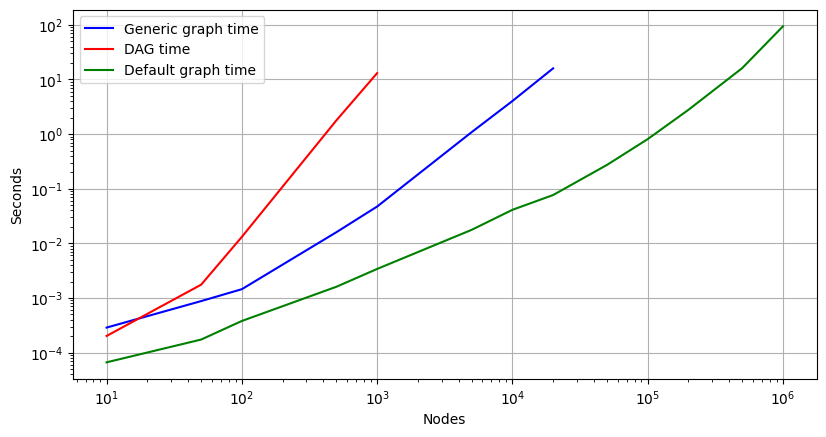

In [22]:
plot_testing(nodes, [time1, time2, time3],
             colors=["blue", "red", "green"],
             labels=["Generic graph time", "DAG time", "Default graph time"],
             y_label="Seconds")